In [2]:
print("TESTING:")

TESTING:


# Python MySQL

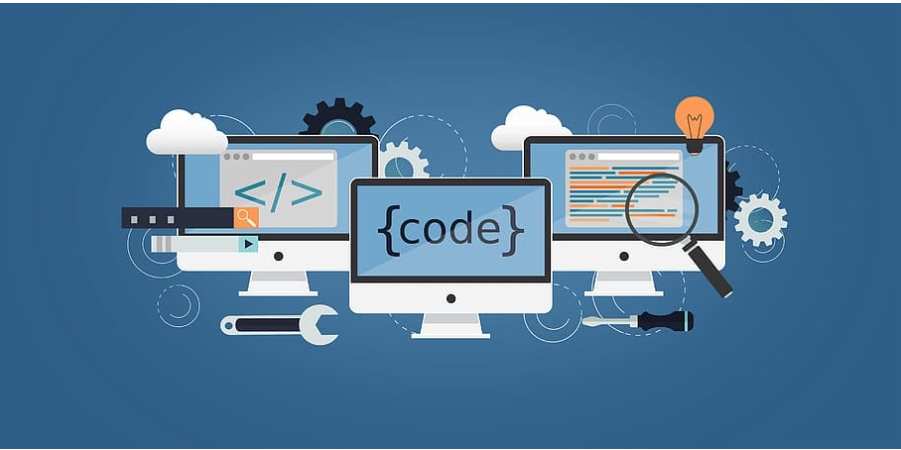

#Python can be used in database applications.
#MySQL is one of the most popular database.


# MySQL Database
1. You can download a MySQL database at https://www.mysql.com/downloads/.
2. How to Download and Setup in your local Machine https://docs.google.com/document/d/1d5VfCZcpuFxno80PrEy0a1YZOooobDW4oXrNgG17eNY/edit?usp=sharing


# Install MySQL Driver
1. Python needs a MySQL driver to access the MySQL database.
2. We use PIP to install Mysql Connector.
3. PIP is most likely already installed in your Python environment.

4. Command:- python -m pip install mysql-connector-python


In [5]:
#!python -m pip install mysql-connector-python
#!python.exe -m pip install --upgrade pip
!pip install mysql-connector-python


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Test MySQL Connector
( In first.py )

In [1]:
import mysql.connector
print('Import Successfully!')

Import Successfully!


# Create Connection
1. Start by creating a connection to the database.

2. Use the username and password from your MySQL database:

In [2]:
import mysql.connector

# mydb = mysql.connector.connect(
#     host="localhost",
#     port=3306,  # Change if needed
#     user="root",
#     password="jroshan@98"
# )
#print('Database connect succssfully')
try:
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="jroshan@98"
    )
    print("Database connected successfully")
except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
  print('End of Program')

Database connected successfully
End of Program


# Python MySQL Create Database

In [3]:
mycursor = mydb.cursor() # create a cursor object
mycursor.execute("CREATE DATABASE if not exists my_db")
print("DataBase created successfully")

DataBase created successfully


# Check if Database Exists

In [4]:
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)
  
# see my_db database at line number 5

('algo',)
('course',)
('dashboarddb',)
('hospital',)
('ig_clone',)
('information_schema',)
('learning_model',)
('my_db',)
('my_sql_course',)
('mysql',)
('parameter_examples',)
('performance_schema',)
('product_db',)
('quiz_app',)
('sql_course',)
('sys',)
('table_db',)
('taskdb',)
('testdb',)
('testing',)
('users',)


In [39]:
try:
    mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="jroshan@98",
    database="my_db"
    )
    mycursor = mydb.cursor() # create a cursor object
    mycursor.execute("CREATE TABLE  if not exists customers\
                    (id int AUTO_INCREMENT PRIMARY KEY,\
                    name VARCHAR(255),\
                    address VARCHAR(255))")
    print("Table Created Successfully")
except mysql.connector.Error as err:
    print("Something went wrong: {}".format(err))
finally:
    # mydb.close()
    print("End of Program")
    # execute SQL query to create table

Table Created Successfully
End of Program


# Check if Database Exists

In [8]:
mycursor.execute("show tables")
mycursor.fetchall()

[('customers',)]

# Drop Database and table and Truncate table

In [ ]:
# mycursor.execute("DROP database IF EXISTS my_db")
# mycursor.execute("DROP TABLE IF EXISTS customers")
# mycursor.execute("Truncate customers")

## Insert records in database table 

In [9]:
mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = ("Jroshan", "25")
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


# Insert Many records in database table 

In [20]:
mycursor = mydb.cursor()

sql = "INSERT INTO customers (name, address) VALUES (%s, %s)"
val = [
  ('Peter', 'Lowstreet 4'),
  ('Amy', 'Apple st 652'),
  ('Hannah', 'Mountain 21'),
  ('Michael', 'Valley 345'),
  ('Sandy', 'Ocean blvd 2'),
  ('Betty', 'Green Grass 1'),
  ('Richard', 'Sky st 331'),
  ('Susan', 'One way 98'),
  ('Vicky', 'Yellow Garden 2'),
  ('Ben', 'Park Lane 38'),
  ('William', 'Central st 954'),
  ('Chuck', 'Main Road 989'),
  ('Viola', 'Sideway 1633')
]

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

13 was inserted.


# Get data from customers table 

In [40]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM customers")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Jroshan', '25')
(2, 'Peter', 'Lowstreet 4')
(3, 'Amy', 'Apple st 652')
(5, 'Michael', 'Canyon 123')
(6, 'Sandy', 'Ocean blvd 2')
(7, 'Betty', 'Green Grass 1')
(8, 'Richard', 'Sky st 331')
(9, 'Susan', 'One way 98')
(10, 'Vicky', 'Yellow Garden 2')
(11, 'Ben', 'Park Lane 38')
(12, 'William', 'Central st 954')
(13, 'Chuck', 'Main Road 989')
(14, 'Viola', 'Sideway 1633')
(15, 'Jroshan', '25')


# Get Data with Filtering applied

In [11]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE name ='Jroshan'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Jroshan', '25')
(15, 'Jroshan', '25')


# Apply Or and AND Condition

In [12]:
mycursor = mydb.cursor()
sql = "SELECT * from customers where id =%s and name =%s"
values = (1,'Jroshan')
mycursor.execute(sql,values)

results = mycursor.fetchall()
for row in results:
    print(row)

(1, 'Jroshan', '25')


In [13]:
mycursor = mydb.cursor()
sql = "SELECT * from customers where id =%s or id =%s"
values = (1,5)
mycursor.execute(sql,values)

results = mycursor.fetchall()
for row in results:
    print(row)

(1, 'Jroshan', '25')
(5, 'Michael', 'Canyon 123')


In [14]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address = %s"
adr = ("Yellow Garden 2", )

mycursor.execute(sql, adr)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(10, 'Vicky', 'Yellow Garden 2')


# IN , NOT IN

In [41]:
mycursor = mydb.cursor()
ids = (1, 2, 3)  # Tuple of IDs

# Generate a correct number of placeholders (%s) based on the number of IDs
placeholders = ', '.join(['%s'] * len(ids))

# sql = "SELECT * FROM customers WHERE id in({placeholders})"
sql = f"SELECT * FROM customers WHERE id IN ({placeholders})"
mycursor.execute(sql, ids)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Jroshan', '25')
(2, 'Peter', 'Lowstreet 4')
(3, 'Amy', 'Apple st 652')


In [42]:
mycursor = mydb.cursor()
ids = (1, 2, 3)  # Tuple of IDs

# Generate a correct number of placeholders (%s) based on the number of IDs
placeholders = ', '.join(['%s'] * len(ids))

# sql = "SELECT * FROM customers WHERE id in({placeholders})"
sql = f"SELECT * FROM customers WHERE id NOT IN ({placeholders})"
mycursor.execute(sql, ids)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(5, 'Michael', 'Canyon 123')
(6, 'Sandy', 'Ocean blvd 2')
(7, 'Betty', 'Green Grass 1')
(8, 'Richard', 'Sky st 331')
(9, 'Susan', 'One way 98')
(10, 'Vicky', 'Yellow Garden 2')
(11, 'Ben', 'Park Lane 38')
(12, 'William', 'Central st 954')
(13, 'Chuck', 'Main Road 989')
(14, 'Viola', 'Sideway 1633')
(15, 'Jroshan', '25')


# Wildcard Characters

# find any customer whose address have way letters

In [43]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE address LIKE '%way%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(9, 'Susan', 'One way 98')
(14, 'Viola', 'Sideway 1633')


# find any customer  whose name should be start s

In [45]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE name LIKE 's%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(6, 'Sandy', 'Ocean blvd 2')
(9, 'Susan', 'One way 98')


# find any customer whose name should be end with a

In [46]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE name LIKE '%a'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(14, 'Viola', 'Sideway 1633')


# find any customer whose name second letter should be i

In [47]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE name LIKE '_i%'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(5, 'Michael', 'Canyon 123')
(8, 'Richard', 'Sky st 331')
(10, 'Vicky', 'Yellow Garden 2')
(12, 'William', 'Central st 954')
(14, 'Viola', 'Sideway 1633')


# find any customer whose name sencod last letter should be a

In [48]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers WHERE name LIKE '%a_'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'Jroshan', '25')
(9, 'Susan', 'One way 98')
(12, 'William', 'Central st 954')
(15, 'Jroshan', '25')


# Python MySQL Order By
Use the ORDER BY statement to sort the result in ascending or descending order.

In [16]:
# Ascending order is default
mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(3, 'Amy', 'Apple st 652')
(11, 'Ben', 'Park Lane 38')
(7, 'Betty', 'Green Grass 1')
(13, 'Chuck', 'Main Road 989')
(1, 'Jroshan', '25')
(15, 'Jroshan', '25')
(5, 'Michael', 'Canyon 123')
(2, 'Peter', 'Lowstreet 4')
(8, 'Richard', 'Sky st 331')
(6, 'Sandy', 'Ocean blvd 2')
(9, 'Susan', 'One way 98')
(10, 'Vicky', 'Yellow Garden 2')
(14, 'Viola', 'Sideway 1633')
(12, 'William', 'Central st 954')


In [17]:
# Descending Orders
mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name desc"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(12, 'William', 'Central st 954')
(14, 'Viola', 'Sideway 1633')
(10, 'Vicky', 'Yellow Garden 2')
(9, 'Susan', 'One way 98')
(6, 'Sandy', 'Ocean blvd 2')
(8, 'Richard', 'Sky st 331')
(2, 'Peter', 'Lowstreet 4')
(5, 'Michael', 'Canyon 123')
(1, 'Jroshan', '25')
(15, 'Jroshan', '25')
(13, 'Chuck', 'Main Road 989')
(7, 'Betty', 'Green Grass 1')
(11, 'Ben', 'Park Lane 38')
(3, 'Amy', 'Apple st 652')


# LIMIT ( Fixed numbers of rows)

In [20]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name DESC LIMIT 5"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(12, 'William', 'Central st 954')
(14, 'Viola', 'Sideway 1633')
(10, 'Vicky', 'Yellow Garden 2')
(9, 'Susan', 'One way 98')
(6, 'Sandy', 'Ocean blvd 2')


In [19]:
mycursor.rowcount

5

# Start From Another Position ( Offset )

In [21]:
mycursor = mydb.cursor()

sql = "SELECT * FROM customers ORDER BY name DESC LIMIT 5 offset 3"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

(9, 'Susan', 'One way 98')
(6, 'Sandy', 'Ocean blvd 2')
(8, 'Richard', 'Sky st 331')
(2, 'Peter', 'Lowstreet 4')
(5, 'Michael', 'Canyon 123')


In [63]:
mycursor.rowcount

5

# Python MySQL Delete From By

In [64]:
mycursor = mydb.cursor()

sql = "DELETE FROM customers WHERE address = 'Mountain 21'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

1 record(s) deleted


In [65]:
mycursor.rowcount

1

# Python Mysql Update command

In [22]:
mycursor = mydb.cursor()

sql = "UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345'"

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) affected")

0 record(s) affected


# Using Another Database for 

In [23]:
try:
    mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="jroshan@98",
    database="quiz_app"
    )
except mysql.connector.Error as err:
    print("Something went wrong: {}".format(err))
finally:
    print("End of Program")
    
mycursor = mydb.cursor() # create a cursor object
mycursor.execute("show tables")
for x in mycursor:
    print(x)

End of Program
('load_data',)
('loan_data',)
('post',)
('questions',)
('quizzes',)
('scores',)
('user',)
('users',)


# Load Quiz_app -> loan_data

In [24]:
cursor = mydb.cursor()
cursor.execute("select * from loan_data limit 1000")
res = cursor.fetchall()
for row in res:
    print(row)
    
# person_age,
# person_gender,
# person_education,
# person_income,
# person_emp_exp,
# person_home_ownership,
# loan_amnt,
# loan_intent,
# loan_int_rate,
# loan_percent_income,
# cb_person_cred_hist_length,
# credit_score,
# previous_loan_defaults_on_file,
# loan_status



(22.0, 'female', 'Master', 71948.0, 0, 'RENT', 35000.0, 'PERSONAL', 16.02, 0.49, 3.0, 561, 'No', 1)
(21.0, 'female', 'High School', 12282.0, 0, 'OWN', 1000.0, 'EDUCATION', 11.14, 0.08, 2.0, 504, 'Yes', 0)
(25.0, 'female', 'High School', 12438.0, 3, 'MORTGAGE', 5500.0, 'MEDICAL', 12.87, 0.44, 3.0, 635, 'No', 1)
(23.0, 'female', 'Bachelor', 79753.0, 0, 'RENT', 35000.0, 'MEDICAL', 15.23, 0.44, 2.0, 675, 'No', 1)
(24.0, 'male', 'Master', 66135.0, 1, 'RENT', 35000.0, 'MEDICAL', 14.27, 0.53, 4.0, 586, 'No', 1)
(21.0, 'female', 'High School', 12951.0, 0, 'OWN', 2500.0, 'VENTURE', 7.14, 0.19, 2.0, 532, 'No', 1)
(26.0, 'female', 'Bachelor', 93471.0, 1, 'RENT', 35000.0, 'EDUCATION', 12.42, 0.37, 3.0, 701, 'No', 1)
(24.0, 'female', 'High School', 95550.0, 5, 'RENT', 35000.0, 'MEDICAL', 11.11, 0.37, 4.0, 585, 'No', 1)
(24.0, 'female', 'Associate', 100684.0, 3, 'RENT', 35000.0, 'PERSONAL', 8.9, 0.35, 2.0, 544, 'No', 1)
(21.0, 'female', 'High School', 12739.0, 0, 'OWN', 1600.0, 'VENTURE', 14.74, 0.1

# Python Mysql Group By -- ( max , min , sum , avg, count ) Aggregations functions 

## Get minimum person income and loan amout based for each person age wise

In [27]:
cursor = mydb.cursor()
cursor.execute("select person_age,min(person_income),\
               min(loan_amnt)\
               from loan_data group by person_age order by person_age")
res = cursor.fetchall()
for row in res:
    print(row)
    
# same as max, avg, sum , count

(20.0, 40239.0, 2000.0)
(21.0, 8000.0, 700.0)
(22.0, 8000.0, 500.0)
(23.0, 8000.0, 1000.0)
(24.0, 8000.0, 922.0)
(25.0, 8000.0, 750.0)
(26.0, 8000.0, 500.0)
(27.0, 13004.0, 725.0)
(28.0, 10649.0, 1000.0)
(29.0, 8037.0, 700.0)
(30.0, 12258.0, 950.0)
(31.0, 10754.0, 1000.0)
(32.0, 8000.0, 563.0)
(33.0, 13376.0, 500.0)
(34.0, 10665.0, 1000.0)
(35.0, 13243.0, 1000.0)
(36.0, 8000.0, 912.0)
(37.0, 8104.0, 1000.0)
(38.0, 11103.0, 1000.0)
(39.0, 8000.0, 1000.0)
(40.0, 11372.0, 1000.0)
(41.0, 8000.0, 1000.0)
(42.0, 16684.0, 1000.0)
(43.0, 14341.0, 1000.0)
(44.0, 15209.0, 1000.0)
(45.0, 17165.0, 1000.0)
(46.0, 10510.0, 1000.0)
(47.0, 15590.0, 1000.0)
(48.0, 12644.0, 1169.0)
(49.0, 18921.0, 1750.0)
(50.0, 23698.0, 1500.0)
(51.0, 12865.0, 1000.0)
(52.0, 19532.0, 1000.0)
(53.0, 8000.0, 1400.0)
(54.0, 25099.0, 1000.0)
(55.0, 30598.0, 1000.0)
(56.0, 24016.0, 2500.0)
(57.0, 18747.0, 2000.0)
(58.0, 24991.0, 1500.0)
(59.0, 45292.0, 1000.0)
(60.0, 12247.0, 1500.0)
(61.0, 14174.0, 4000.0)
(62.0, 21156.0, 

## Get maximum person income and  minimum loan amout based for each Education wise

In [ ]:
cursor = mydb.cursor()
cursor.execute("select person_education,max(person_income) as max_amount,\
               min(loan_amnt) as min_loan\
               from loan_data group by person_education order by max_amount")
res = cursor.fetchall()
for row in res:
    print(row)

('Master', 1080918.0, 500.0)
('Doctorate', 1440982.0, 1000.0)
('Bachelor', 5545545.0, 500.0)
('High School', 5556399.0, 500.0)
('Associate', 7200766.0, 563.0)


## Get maximum person income and total loan amout for each loan intent wise

In [28]:
cursor = mydb.cursor()
cursor.execute("select loan_intent,max(person_income) as max_amount,\
               sum(loan_amnt) as total_loan\
               from loan_data group by loan_intent order by total_loan")
res = cursor.fetchall()
for row in res:
    print(row)

('HOMEIMPROVEMENT', 994533.0, 93888723.0)
('DEBTCONSOLIDATION', 1728974.0, 127128669.0)
('PERSONAL', 7200766.0, 134321642.0)
('VENTURE', 5556399.0, 142582219.0)
('MEDICAL', 1661567.0, 145607575.0)
('EDUCATION', 2139143.0, 161433137.0)


## Get maximum person income and average loan amout for each person gender wise.

In [29]:
cursor = mydb.cursor()
cursor.execute("select person_gender,max(person_income) as max_amount,\
               avg(loan_amnt) as average_amount\
               from loan_data group by person_gender order by average_amount")
res = cursor.fetchall()
for row in res:
    print(row)

('female', 7200766.0, 9410.063668639054)
('male', 5556399.0, 9519.17684627339)


## Get total number of loan intent based on each gender.

In [30]:
cursor = mydb.cursor()
cursor.execute("select person_gender,count(loan_intent)\
               from loan_data group by person_gender")

res = cursor.fetchall()
for row in res:
    print(row)

('female', 38025)
('male', 46973)


## Get total number of records in each loan intent.

In [31]:
cursor = mydb.cursor()
cursor.execute("select loan_intent,count(loan_intent)\
               from loan_data group by loan_intent")

res = cursor.fetchall()
for row in res:
    print(row)

('PERSONAL', 14136)
('EDUCATION', 17273)
('MEDICAL', 16011)
('VENTURE', 14932)
('HOMEIMPROVEMENT', 9138)
('DEBTCONSOLIDATION', 13508)


## Get total number of records in each educations.

In [32]:
cursor = mydb.cursor()
cursor.execute("select person_education,count(person_education)\
               from loan_data group by person_education")

res = cursor.fetchall()
for row in res:
    print(row)

('Master', 13310)
('High School', 22611)
('Bachelor', 25249)
('Associate', 22694)
('Doctorate', 1134)


## Get total number of records in each Home Ownership.

In [33]:
cursor = mydb.cursor()
cursor.execute("select person_home_ownership,count(person_home_ownership)\
               from loan_data group by person_home_ownership")

res = cursor.fetchall()
for row in res:
    print(row)

('RENT', 44375)
('OWN', 6039)
('MORTGAGE', 34332)
('OTHER', 252)


# Python Mysql JOIN ( INNER , SELF, LEFT , RIGHT ,Full)

In [49]:
mycursor.execute("""
    CREATE TABLE customers_table (
        id INT AUTO_INCREMENT PRIMARY KEY,
        name VARCHAR(255),
        city VARCHAR(255)
    )
""")

In [50]:
# Create orders table
mycursor.execute("DROP TABLE IF EXISTS orders")
mycursor.execute("""
    CREATE TABLE orders (
        id INT AUTO_INCREMENT PRIMARY KEY,
        order_date DATE,
        amount DECIMAL(10,2),
        customer_id INT,
        FOREIGN KEY (customer_id) REFERENCES customers(id)
    )
""")

In [54]:
# Insert dummy data into customers
customers_data = [
    ("Alice", "New York"),
    ("Bob", "Los Angeles"),
    ("Charlie", "Chicago"),
    ("David", "Houston"),
    ("Eve", "Miami")
]
mycursor.executemany("INSERT INTO customers_table (name, city) VALUES (%s, %s)", customers_data)

# Insert dummy data into orders
orders_data = [
    ("2024-03-01", 200.50, 1),
    ("2024-03-02", 150.75, 2),
    ("2024-03-03", 300.20, 3),
    ("2024-03-04", 450.00, 1),
    ("2024-03-05", 100.00, 5)
]

mycursor.executemany("INSERT INTO orders (order_date, amount, customer_id) VALUES (%s, %s, %s)", orders_data)

mydb.commit()
print("Dummy data inserted successfully!")

Dummy data inserted successfully!


# Customers Details

In [55]:
cursor = mydb.cursor()
cursor.execute("select * from customers_table")

res = cursor.fetchall()
for row in res:
    print(row)

(1, 'Alice', 'New York')
(2, 'Bob', 'Los Angeles')
(3, 'Charlie', 'Chicago')
(4, 'David', 'Houston')
(5, 'Eve', 'Miami')
(6, 'Alice', 'New York')
(7, 'Bob', 'Los Angeles')
(8, 'Charlie', 'Chicago')
(9, 'David', 'Houston')
(10, 'Eve', 'Miami')
(11, 'Alice', 'New York')
(12, 'Bob', 'Los Angeles')
(13, 'Charlie', 'Chicago')
(14, 'David', 'Houston')
(15, 'Eve', 'Miami')


# Order Details

In [56]:
cursor = mydb.cursor()
cursor.execute("select * from orders")

res = cursor.fetchall()
for row in res:
    print(row)

(1, datetime.date(2024, 3, 1), Decimal('200.50'), 1)
(2, datetime.date(2024, 3, 2), Decimal('150.75'), 2)
(3, datetime.date(2024, 3, 3), Decimal('300.20'), 3)
(4, datetime.date(2024, 3, 4), Decimal('450.00'), 1)
(5, datetime.date(2024, 3, 5), Decimal('100.00'), 5)
(6, datetime.date(2024, 3, 1), Decimal('200.50'), 1)
(7, datetime.date(2024, 3, 2), Decimal('150.75'), 2)
(8, datetime.date(2024, 3, 3), Decimal('300.20'), 3)
(9, datetime.date(2024, 3, 4), Decimal('450.00'), 1)
(10, datetime.date(2024, 3, 5), Decimal('100.00'), 5)
(11, datetime.date(2024, 3, 1), Decimal('200.50'), 1)
(12, datetime.date(2024, 3, 2), Decimal('150.75'), 2)
(13, datetime.date(2024, 3, 3), Decimal('300.20'), 3)
(14, datetime.date(2024, 3, 4), Decimal('450.00'), 1)
(15, datetime.date(2024, 3, 5), Decimal('100.00'), 5)


# A) INNER JOIN (Returns records that have matching values in both tables)

In [60]:
sql = """
    SELECT c.id,c.name, c.city, o.order_date, o.amount
    FROM customers_table as c
    INNER JOIN orders as o ON c.id = o.customer_id
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nINNER JOIN Results:")
for row in result:
    print(row)


INNER JOIN Results:
(1, 'Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
(1, 'Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
(1, 'Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
(2, 'Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
(2, 'Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
(2, 'Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
(3, 'Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
(3, 'Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
(3, 'Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
(5, 'Eve', 'Miami', datetime.date(2024, 3, 5), Decimal('100.00'))
(5, 'Eve', 'Miami', datetime.date(2024, 3, 5), Decimal(

# Count the numbers of orders for each customers 

In [71]:
sql = """
    SELECT c.id,c.name, sum(o.amount) as total_amount
    FROM customers_table as c
    INNER JOIN orders as o ON c.id = o.customer_id
    group by c.id
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nINNER JOIN Results:")
for row in result:
    print(row)


INNER JOIN Results:
(1, 'Alice', Decimal('1951.50'))
(2, 'Bob', Decimal('452.25'))
(3, 'Charlie', Decimal('900.60'))
(5, 'Eve', Decimal('300.00'))


# B) LEFT JOIN (Returns all records from the left table and matching records from the right table)

In [66]:
sql = """
    SELECT c.id,c.name, c.city,o.id, o.order_date, o.amount
    FROM customers_table as c
    LEFT JOIN orders as o ON c.id = o.customer_id
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nLEFT JOIN Results:")
for row in result:
    print(row)



LEFT JOIN Results:
(1, 'Alice', 'New York', 1, datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', 4, datetime.date(2024, 3, 4), Decimal('450.00'))
(1, 'Alice', 'New York', 6, datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', 9, datetime.date(2024, 3, 4), Decimal('450.00'))
(1, 'Alice', 'New York', 11, datetime.date(2024, 3, 1), Decimal('200.50'))
(1, 'Alice', 'New York', 14, datetime.date(2024, 3, 4), Decimal('450.00'))
(2, 'Bob', 'Los Angeles', 2, datetime.date(2024, 3, 2), Decimal('150.75'))
(2, 'Bob', 'Los Angeles', 7, datetime.date(2024, 3, 2), Decimal('150.75'))
(2, 'Bob', 'Los Angeles', 12, datetime.date(2024, 3, 2), Decimal('150.75'))
(3, 'Charlie', 'Chicago', 3, datetime.date(2024, 3, 3), Decimal('300.20'))
(3, 'Charlie', 'Chicago', 8, datetime.date(2024, 3, 3), Decimal('300.20'))
(3, 'Charlie', 'Chicago', 13, datetime.date(2024, 3, 3), Decimal('300.20'))
(4, 'David', 'Houston', None, None, None)
(5, 'Eve', 'Miami', 5, datetime.date(202

# C) RIGHT JOIN (Returns all records from the right table and matching records from the left table)

In [72]:
sql = """
    SELECT c.name, c.city, o.order_date, o.amount
    FROM customers_table as c
    RIGHT JOIN orders as o ON c.id = o.customer_id
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nRIGHT JOIN Results:")
for row in result:
    print(row)


RIGHT JOIN Results:
('Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
('Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
('Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
('Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
('Eve', 'Miami', datetime.date(2024, 3, 5), Decimal('100.00'))
('Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
('Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
('Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
('Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
('Eve', 'Miami', datetime.date(2024, 3, 5), Decimal('100.00'))
('Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
('Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
('Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
('Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
('Eve', 'Miami', datetime.date(

# D) FULL OUTER JOIN (MySQL does not support FULL OUTER JOIN directly, so we use UNION)

In [73]:
sql = """
    (SELECT c.name, c.city, o.order_date, o.amount
     FROM customers_table as c
     LEFT JOIN orders as o ON c.id = o.customer_id)
    UNION
    (SELECT c.name, c.city, o.order_date, o.amount
     FROM customers_table as c
     RIGHT JOIN orders as o ON c.id = o.customer_id)
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nFULL OUTER JOIN Results:")
for row in result:
    print(row)


FULL OUTER JOIN Results:
('Alice', 'New York', datetime.date(2024, 3, 1), Decimal('200.50'))
('Alice', 'New York', datetime.date(2024, 3, 4), Decimal('450.00'))
('Bob', 'Los Angeles', datetime.date(2024, 3, 2), Decimal('150.75'))
('Charlie', 'Chicago', datetime.date(2024, 3, 3), Decimal('300.20'))
('David', 'Houston', None, None)
('Eve', 'Miami', datetime.date(2024, 3, 5), Decimal('100.00'))
('Alice', 'New York', None, None)
('Bob', 'Los Angeles', None, None)
('Charlie', 'Chicago', None, None)
('Eve', 'Miami', None, None)


# E) SELF JOIN (Used when a table references itself, e.g., Employees & Managers)

In [ ]:
mycursor.execute("ALTER TABLE customers_table ADD COLUMN referred_by INT")

In [78]:
# Insert referral data
update_referrals = [
    (2, 1),  # Bob was referred by Alice
    (3, 1),  # Charlie was referred by Alice
    (5, 2)   # Eve was referred by Bob
]

mycursor.executemany("UPDATE customers_table SET referred_by = %s WHERE id = %s", update_referrals)
mydb.commit()

sql = """
    SELECT A.name AS Customer, B.name AS Referred_By
    FROM customers_table A
    LEFT JOIN customers_table B ON A.referred_by = B.id
"""

mycursor.execute(sql)
result = mycursor.fetchall()

print("\nSELF JOIN Results:")
for row in result:
    print(row)


SELF JOIN Results:
('Alice', 'Charlie')
('Bob', 'Eve')
('Charlie', None)
('David', None)
('Eve', None)
('Alice', None)
('Bob', None)
('Charlie', None)
('David', None)
('Eve', None)
('Alice', None)
('Bob', None)
('Charlie', None)
('David', None)
('Eve', None)


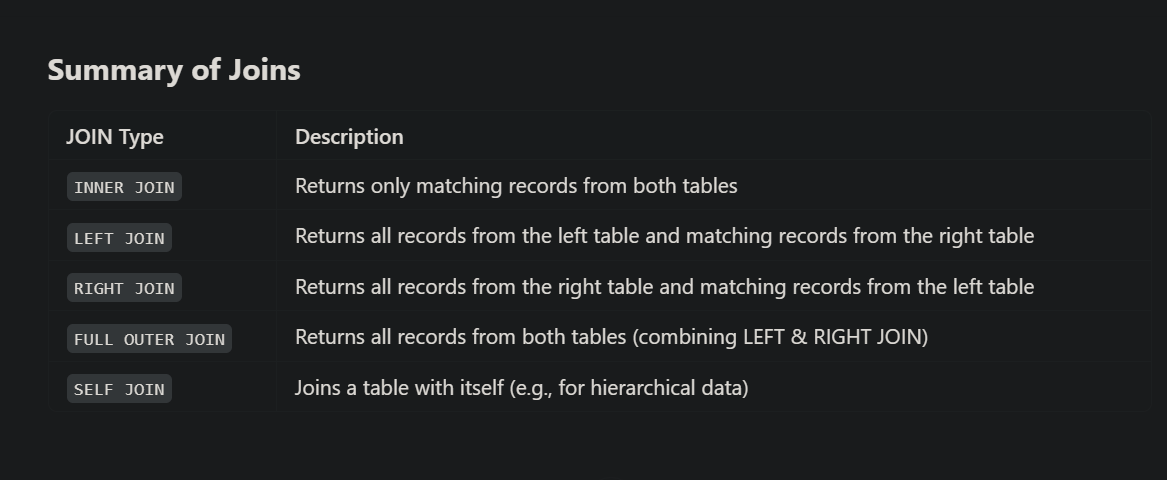